# Application de la fonction de corrélation croisée correlate2D sur une image terrain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.patches as patches

from scipy import signal
from scipy import misc

#import cv2   #Librairie à installer
import time
import warnings
warnings.filterwarnings("ignore")
# Augmenter la densité de pixel
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

# Importation des fonctions depuis le fichier croscor.py 
import os
from croscor import *

band1 = np.load("../data/band1.npy")
band2 = np.load("../data/band2.npy")

In [ ]:
def shiftSelec(im1,im2,axis0,axis1):
    band2_s = np.roll(np.roll(im2,axis0,axis=0),axis1,axis=1)
    #b2 = selection(band2_s,115,1651,30,1054)
    b2 = selection(10*np.log(band2_s),115 + 2 * 256,1651,30 + 256,1054)
    b1 = selection(im1,115 + 2 *256,1651,30 + 256 ,1054)
    return b1,b2


## ANALYSE PAR BLOC - DECALAGE D'IMAGES

### II. Découpage de l'image - Ananlyse du décalage par bloc

In [ ]:
def choice():
    os.chdir('../decoup')
    rez = os.popen('ls -t').read()
    a = rez.split()
    rez2 = [str(i) + ' - ' + a[i] for i in range(len(a)) ]
    print("Liste des résulats (du plus récent au moins récent)")
    for i in range(len(a)):
        print(rez2[i])

    cin = input("Entre le numéro résulat à visualiser : ")

    return a[int(cin)]

def ExtractFeatures(filename):
    #test = "256bs_15sx_15sy_25r_15seuil_0count.png"
    liste = filename.split('_')   
    features = ['f', 'bs', 'ax0', 'ax1', 'seuil', 'count']
    objectFeatures = {}
    for i in range(len(features)):
        objectFeatures[features[i]] = "".join([liste[i][s] for s in range(len(liste[i])) if liste[i][s].isdigit()])
    return objectFeatures
#tab = np.load("../decoup/2f_256bs_15sx_15sy_15seuil_83accu.npy")
#ff = ExtractFeatures("2f_256bs_15sx_15sy_15seuil_83accu.npy")
#print(ff)

In [ ]:
c = choice()

In [ ]:
tab_temp = np.load(c)
count = 0
for x in tab_temp[0]:
    if x == 0.0:
        count += 1
print(count)


In [ ]:
print(tab_temp.shape)

(8, -2)


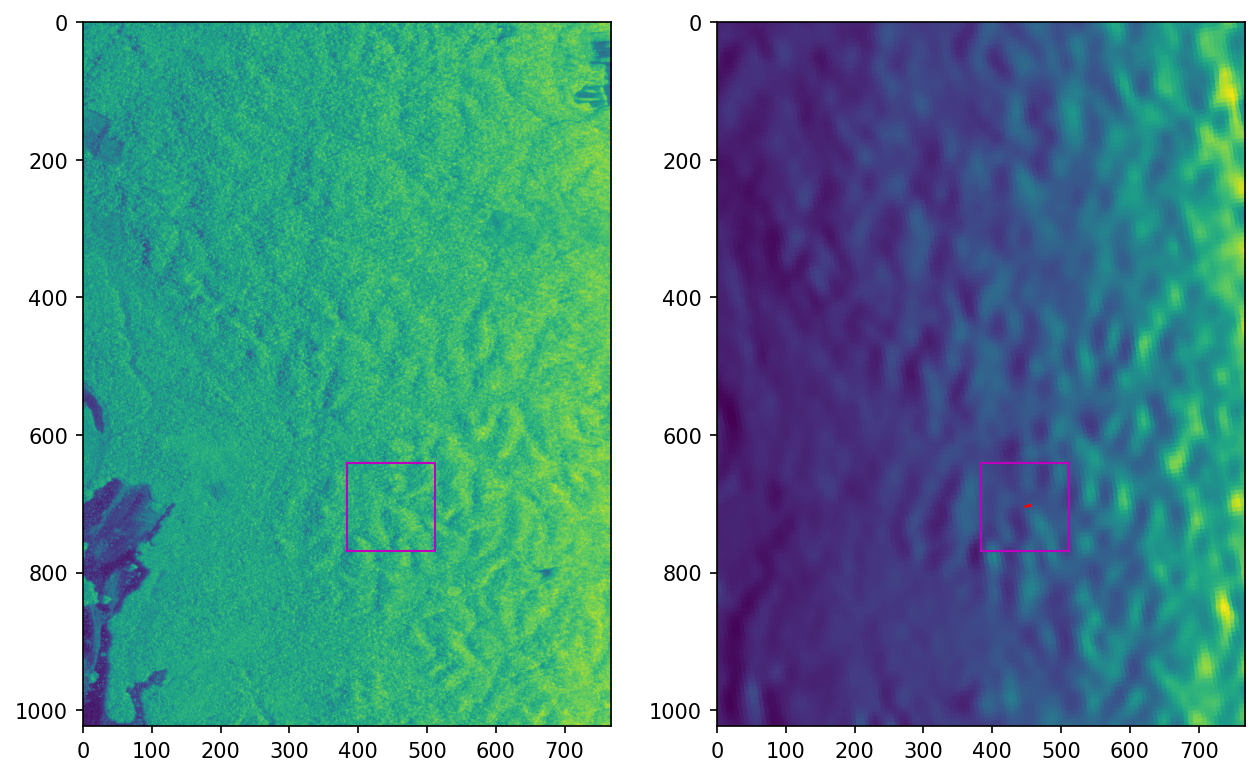

1.4193623065948486


In [20]:
t0 = time.time()
i = 5
j = 3
orig,temp,corr,x,y, tab = decoupage(band2,band1,128,i,j,15,15)  
t1 = time.time()
print(t1 - t0)

(x,y) = (72,62)


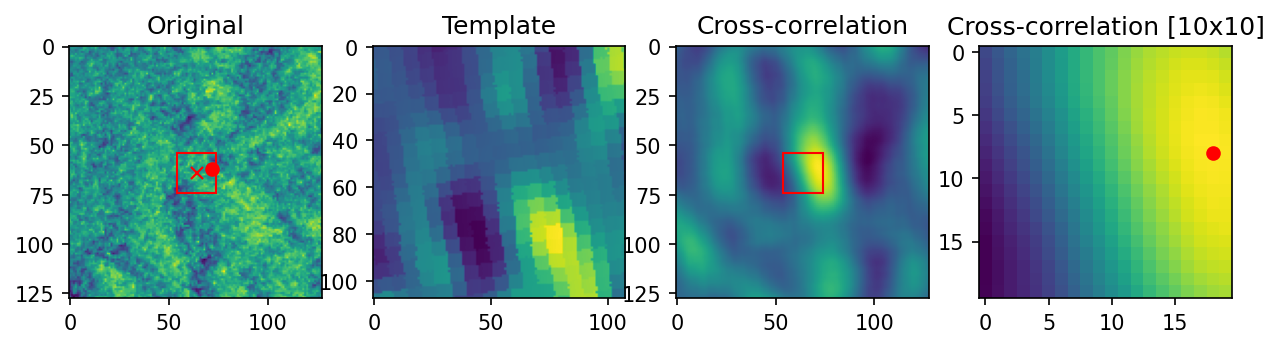

In [21]:
r = 10
displayImg(orig,temp,corr,x,y,r)

In [ ]:
print(tab)

In [ ]:
def ExtractFeatures(filename):
    #test = "256bs_15sx_15sy_25r_15seuil_0count.png"
    liste = filename.split('_')   
    features = ['f', 'bs', 'ax0', 'ax1', 'seuil', 'count']
    objectFeatures = {}
    for i in range(len(features)):
        objectFeatures[features[i]] = "".join([liste[i][s] for s in range(len(liste[i])) if liste[i][s].isdigit()])
    return objectFeatures
tab = np.load("../decoup/2f_256bs_15sx_15sy_15seuil_83accu.npy")
ff = ExtractFeatures("2f_256bs_15sx_15sy_15seuil_83accu.npy")
print(ff)

In [ ]:
def validation(tab,b1,b2,bloc,bs,ff):
    n,m = np.shape(b2)
    band2_new = np.roll(np.roll(b2, int(tab[1][bloc]),axis=0), int(tab[0][bloc]),axis=1)
    yb = n//bs #nb de bloc par col
    xb = m//bs #nb de bloc par ligne
    l = bloc // xb + 1 #indice de ligne du bloc
    c = bloc % xb  + 1#indice de col du bloc
    shift = band2_new[(l-1)*bs:l*bs,(c-1)*bs:c*bs]
    orig = b2[(l-1)*bs:l*bs,(c-1)*bs:c*bs]
    template = b1[(l-1)*bs:l*bs,(c-1)*bs:c*bs]
    plt.imshow(shift)
    plt.savefig('../misc/tests_validation/shift_' + ff['f'] + 'f_' + ff['ax0'] + "sx_" + ff['ax0'] + "sy.png")
    plt.imshow(orig)
    plt.savefig('../misc/tests_validation/orig_' + ff['f'] + 'f_' + ff['ax0'] + "sx_" + ff['ax0'] + "sy.png")
    plt.imshow(template)
    plt.savefig('../misc/tests_validation/template' + ff['f'] + 'f_' + ff['ax0'] + "sx_" + ff['ax0'] + "sy.png")
    compareImg(orig,shift,template,bloc)

In [ ]:
b1,b2 = shiftSelec(band1,band2,15,15) # important : partir du shift qui a servi au calcul

In [ ]:
validation(tab,b1,b2,13,256,ff)

In [ ]:
n,m = np.shape(b1)
bs = 207
nb = (n // bs) * (m // bs) # Nombre de blocs dans l'image
for i in range(nb):
    validation(tab,b1,b2,i,207)

In [ ]:
band2_new = np.roll(np.roll(b2,ym,axis=0),xm,axis=1)

In [ ]:
plt.imshow(band2_test[2*207:3*207,3*207:4*207])
final = band2_test[2*207:3*207,3*207:4*207]

In [ ]:
compareImg(temp,final)

In [ ]:
def decalageImg(bandr2,bandr1):
    tabx = []
    taby = []
        
    for i in range(3):
        for j in range(3):
            band2Block = np.copy(bandr2[i*200:(i*200)+199,j*200:(j*200)+199])
            band1Block = np.copy(bandr1[i*200:(i*200)+199,j*200:(j*200)+199])
            templateBlock = np.copy(band1Block[10:190,10:190])
                        
            orig,temp,corr,x,y = decalageBloc(band2Block,templateBlock)
            displayImg(orig,temp,corr,x,y)
            xm = x-100
            ym = y-100
            tabx.append(xm)
            taby.append(ym)
    return tabx,taby

# # tabx,taby = decalageImg(gaussianFilter(bandr2,4),bandr1)
# rez = []
# for i in range(1,5):

tabx,taby = decalageImg(gaussianFilter(bandr2,5),gaussianFilter(bandr1,2))
#rez.append(countCorrect(tabx,taby,20)[1])
# plt.plot(rez)
# plt.show()

### Tendance

In [ ]:
def countCorrect(tabx,taby,seuil, verbose=False):
    count = 0
    dist = []
    for i in range(len(tabx)):
        distance = np.sqrt(tabx[i]**2 + taby[i]**2)
        if verbose :
            print("Décalage du block " +str(i)+ " : %.2f" % (np.sqrt(tabx[i]**2 + taby[i]**2)*5) + " m.")
        if distance < seuil:  #distance inférieure à 50 px (c'est beaucoup)
            count +=1
        dist.append(distance)    
    if verbose:
        print(str(count)+" corrects sur "+ str(len(tabx)) + " avec une marge de " + str(seuil * 5) +" m.")
    return count, np.mean(distance*5)

In [ ]:
def interpol(f,ux,uy) :
    # function that computes f \circ Id+u and interpolates it on a mesh
    nx,ny=f.shape
    ip=interpolate.RectBivariateSpline(np.arange(nx),np.arange(ny),f)
    [X,Y]=np.meshgrid(np.arange(nx),np.arange(ny), indexing='ij')
    X=X+ux
    Y=Y+uy
    return np.reshape(ip.ev(X.ravel(),Y.ravel()),(nx,ny))

### III. Algorithme itératif - Test Taille de bloc / Valeur de Shift - Recherche de la meilleure configuration

ENTREES : Valeurs de shift | Tailles de blocs (TABLEAUX)

SORTIES : Liste de résultats de configuration | Meilleure configuration

In [ ]:
def AnalyseBloc(im2,im1,Tblocsize,Tshift):
    
    # VARIABLES
    configSummary = [] # Liste de tuples | ELEMENT = ( Nombre Blocs Corrects , déc x , déc y , Taille Bloc )
    valTemp = 0
    
    # Triple boucle - TEST DE TOUTES LES COMBINAISONS POSSIBLES
    for i in Tshift:
        for j in Tshift:
            for k in Tblocsize:
                # Application du découpage - SORTIE DU DECALAGE 
                tx, ty = decoupage(im2, im1, i, j)
                # COMPTAGE des blocs corrects (err < 25 pixels)
                val,mean = countCorrect(tx,ty,25)
                # TUPLE de la configuration | Ajout à la liste
                configTuple = (val,i,j,k)
                configSummary.append(configTuple)
                
                # RECHERCHE de configuration optimale (Maximisation de val)
                if val > valTemp : 
                    configBest = np.copy(configTuple)
                
                # SAUVEGARDE des figures
                plt.savefig("results/"+str(k) + "x" + str(k)+"_"+str(i) + "ax0" + "_"+str(j)+"ax1"+".png")

                
                valTemp = np.copy(val)
                
    return configSummary, configBest
            

In [ ]:
# DONNEES | Shift et Taille de Bloc
tabShift = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
tabBlocSize = [207, 115]

Merci de ne pas exécuter le bloc qui suit :

In [ ]:
#summary, config = AnalyseBloc(band2,band1,tabBlocSize,tabShift)
#print(summary)
#print(config)

TRUCS PAS ENCORE FAITS 

    - classer proprement les résultats dans un tableau | faire un AFFICHAGE de la night
    
    - se mettre d'accord sur le comptage des blocs corrects : soit dans decoupage, soit dans AnalyseBloc    

In [ ]:
print (207/2)


## Wavelet transform

In [ ]:
import pywt
import pywt.data

# Load image
original = band1

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'db2')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest")
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()